In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
import keras
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import random
from sklearn.utils import shuffle
from tqdm import tqdm
from tensorflow.keras.layers import Activation, Dropout, Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization

In [2]:
# directory=r'D:\Banana\Test'#read main dataset
class_names=['freshbanana','rottenbanana'] # classes of dataset 1 step
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)
IMAGE_SIZE =(150, 150)
img_size=150

In [3]:
def load_data():
    datasets = ['D:\Banana\Train', 'D:\Banana\Test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
# def load_data():
#     directory = r'D:\Banana\Train', r'D:\Banana\Test'
#     category=['freshbanana','rottenbanana'] 
#     X=[] # step 4
#     Y=[]
#     dataset=[]
#     for ctg in category: # ready for dataset training and Testing 
#         folder=os.path.join(directory, ctg)
#         classes=category.index(ctg)
#         for img in os.listdir(folder):
#             try:
#                 img_array=cv2.imread(os.path.join(folder,img))
#                 new_array=cv2.resize(img_array, (img_size,img_size))
#                 dataset.append([new_array,classes])
#             except Exception as e:
#                 pass
#     return dataset

In [5]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading D:\Banana\Train


100%|██████████████████████████████████████████████████████████████████████████████| 2224/2224 [00:42<00:00, 51.80it/s]


Loading D:\Banana\Test


100%|████████████████████████████████████████████████████████████████████████████████| 530/530 [00:11<00:00, 47.70it/s]


In [6]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
test_images, test_labels = shuffle(test_images, test_labels)

In [7]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [8]:
test_images.shape

(911, 150, 150, 3)

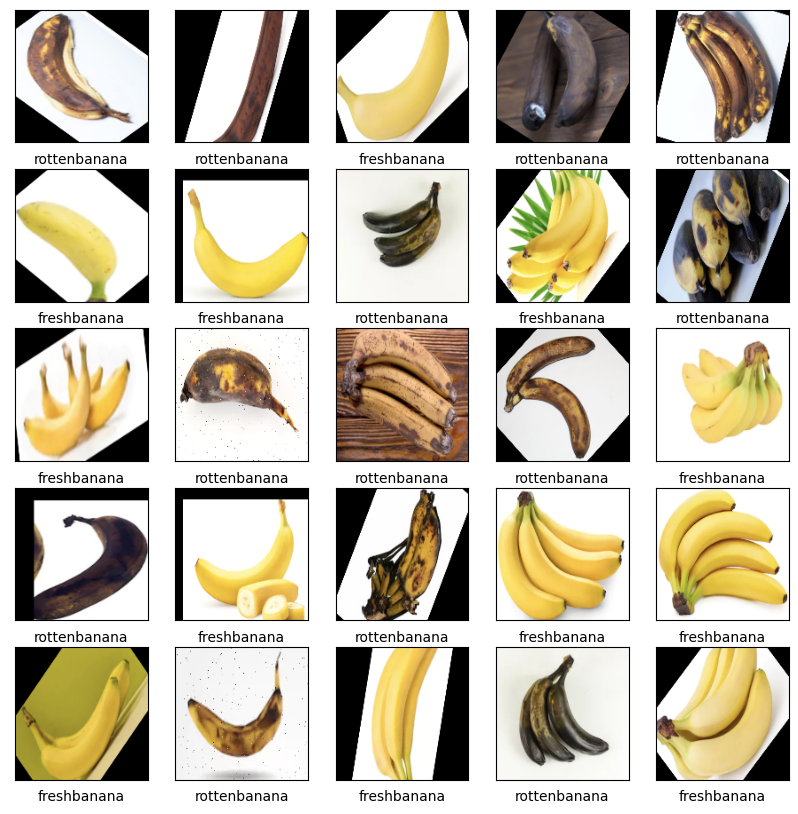

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [10]:
model = models.Sequential() # model 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(2,activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history =model.fit(train_images, train_labels, epochs=10,batch_size=32,validation_data=(test_images,test_labels))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [38]:
model.evaluate(test_images,test_labels,batch_size=32)

29/29 [==============================] - 4s 121ms/step - loss: 0.0019 - accuracy: 1.0000


[0.001940697431564331, 1.0]

29/29 [==============================] - 4s 121ms/step - loss: 0.0019 - accuracy: 1.0000


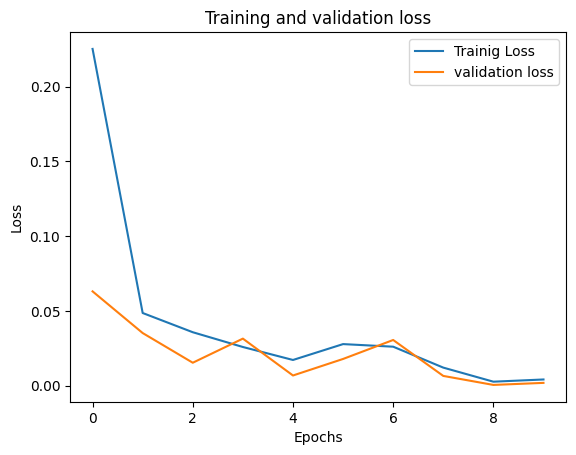

In [39]:
model.evaluate(test_images,test_labels,batch_size=32, verbose=1)
plt.plot(history.history['loss'],label='Trainig Loss')
plt.plot(history.history['val_loss'],label="validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
#plt.savefig("D:\Vehicle\img1.png")
plt.show()

29/29 [==============================] - 4s 121ms/step - loss: 0.0019 - accuracy: 1.0000


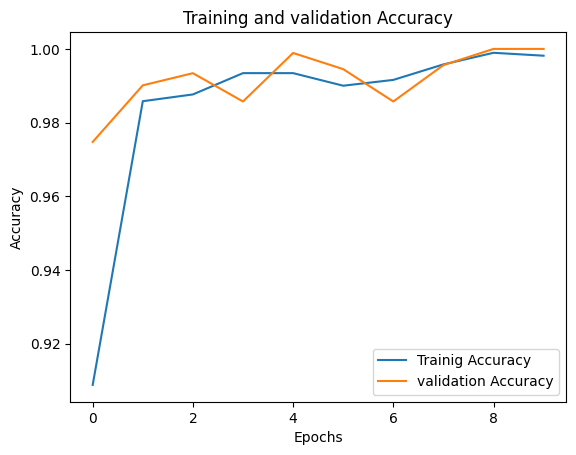

In [40]:
model.evaluate(test_images,test_labels,batch_size=32, verbose=1)
plt.plot(history.history['accuracy'],label='Trainig Accuracy')
plt.plot(history.history['val_accuracy'],label="validation Accuracy")
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
#plt.savefig("D:\Vehicle\img2.png")
plt.show()

In [31]:
test_loss = model.evaluate(test_images, test_labels)

29/29 [==============================] - 4s 122ms/step - loss: 0.0065 - accuracy: 0.9956


In [41]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

29/29 [==============================] - 4s 121ms/step


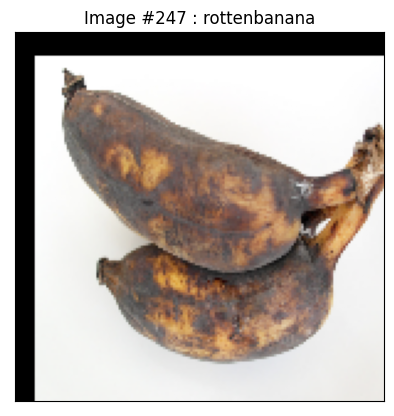

In [42]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
y_pred=model.predict(test_images)
y_pred_class=np.argmax(y_pred,axis=1)
cm=confusion_matrix(test_labels,y_pred_class)
print("confusion matrix: \n",cm)
print("Classification Report: \n",classification_report(test_labels,y_pred_class))

29/29 [==============================] - 4s 121ms/step
confusion matrix: 
 [[381   0]
 [  0 530]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       381
           1       1.00      1.00      1.00       530

    accuracy                           1.00       911
   macro avg       1.00      1.00      1.00       911
weighted avg       1.00      1.00      1.00       911



In [44]:
y_pred_class

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,

In [3]:
cm = pd.DataFrame(cm,index = class_names, 
                     columns = class_names)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm,annot=True,cmap=plt.cm.Oranges,fmt='d')
plt.tight_layout()
plt.title('Confusion matrix ')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [25]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 3805
Number of testing examples: 911
Each image is of size: (150, 150)
